<a href="https://colab.research.google.com/github/jes11111/Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
cd/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


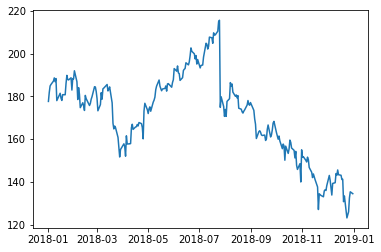

In [6]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

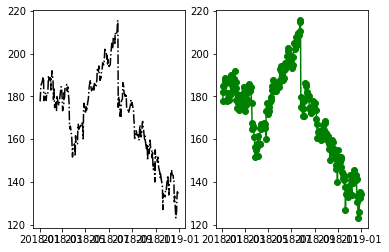

In [13]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(fb.index,fb.open,'-.k')
axes[1].plot(fb.index,fb.open,'o-g')

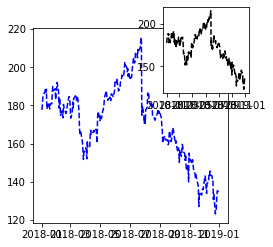

In [18]:
fig = plt.figure(figsize=(3,3))
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside = fig.add_axes([0.7,0.7,0.4,0.4])
outside.plot(fb.index, fb.open,'--b')
inside.plot(fb.index, fb.open, '--k');

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [26]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

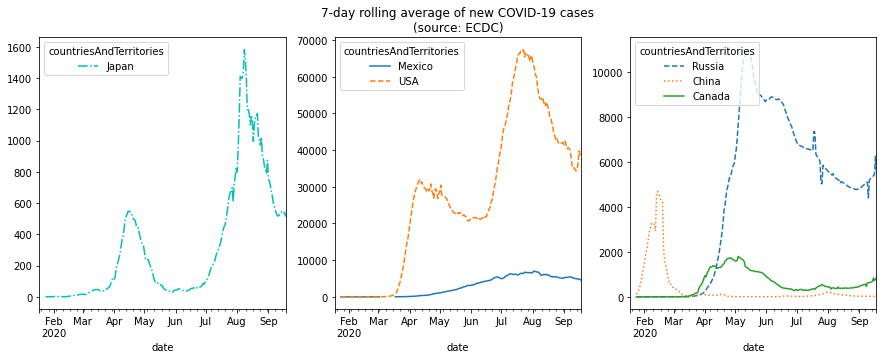

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['Japan']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Mexico', 'USA']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Russia', 'China', 'Canada']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

Text(0, 0.5, 'count')

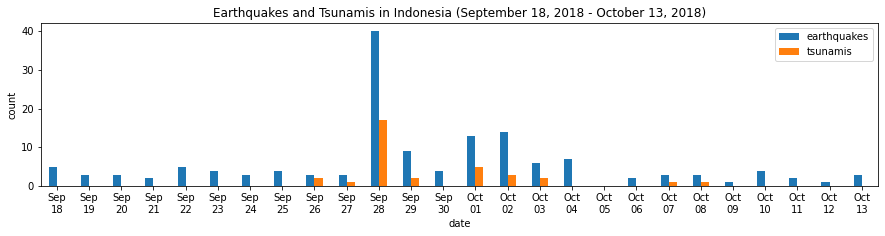

In [38]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d') # date to string

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

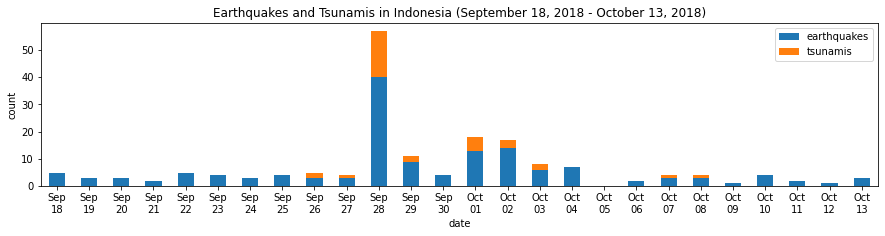

In [39]:
indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked = True

)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

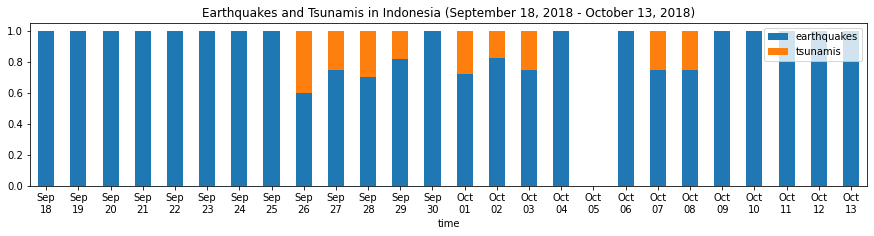

In [40]:
indonesia_quakes[['tsunami', 'earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked = True
);